In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sargento-270218.csv",skiprows=4, header=None, names=['Date','Pres','Temp','water_level'])
#df.Date = pd.to_numeric(df.Date, errors='coerce')
df.Pres = pd.to_numeric(df.Pres, errors='coerce')
df.Temp = pd.to_numeric(df.Temp, errors='coerce')
df.water_level = pd.to_numeric(df.water_level, errors='coerce')
df.head()

,Date,Pres,Temp,water_level
3,02/04/2018 10:15:00,107.791,16.903,0.032
4,02/04/2018 10:30:00,107.791,16.903,0.032
5,02/04/2018 10:45:00,107.791,16.903,0.032
6,02/04/2018 11:00:00,107.791,16.903,0.032
7,02/04/2018 11:15:00,107.791,16.903,0.032


In [3]:
df1 = pd.read_csv("sargento-salinidad-270218.csv",skiprows=2, header=None, names=['Date','cond','temp','specific','salinity'])
#df.Date = pd.to_numeric(df.Date, errors='coerce')
#df1.cond = pd.to_numeric(df1.cond, errors='coerce'
#df1.temp = pd.to_numeric(df1.temp, errors='coerce')
#df1.specific = pd.to_numeric(df1.specific, errors='coerce')
#df1.salinity = pd.to_numeric(df1.salinity, errors='coerce')
#df1.head()

In [4]:
df1.head()

,Date,cond,temp,specific,salinity
3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482
4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203
5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595
6,02/04/2018 10:45:00,50958.7,17.11,60050.6,40.2458
7,02/04/2018 11:00:00,51145.6,17.10,60283.2,40.4226


In [5]:
df.Date

3       02/04/2018 10:15:00
4       02/04/2018 10:30:00
5       02/04/2018 10:45:00
6       02/04/2018 11:00:00
7       02/04/2018 11:15:00
8       02/04/2018 11:30:00
9       02/04/2018 11:45:00
10      02/04/2018 12:00:00
11      02/04/2018 12:15:00
12      02/04/2018 12:30:00
13      02/04/2018 12:45:00
14      02/04/2018 13:00:00
15      02/04/2018 13:15:00
16      02/04/2018 13:30:00
17      02/04/2018 13:45:00
18      02/04/2018 14:00:00
19      02/04/2018 14:15:00
20      02/04/2018 14:30:00
21      02/04/2018 14:45:00
22      02/04/2018 15:00:00
23      02/04/2018 15:15:00
24      02/04/2018 15:30:00
25      02/04/2018 15:45:00
26      02/04/2018 16:00:00
27      02/04/2018 16:15:00
28      02/04/2018 16:30:00
29      02/04/2018 16:45:00
30      02/04/2018 17:00:00
31      02/04/2018 17:15:00
32      02/04/2018 17:30:00
               ...         
2187    02/27/2018 04:15:00
2188    02/27/2018 04:30:00
2189    02/27/2018 04:45:00
2190    02/27/2018 05:00:00
2191    02/27/2018 0

In [6]:
df['Ndate'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %H:%M:%S')
df['month'] = df['Ndate'].dt.month
df.head()

,Date,Pres,Temp,water_level,Ndate,month
3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2
6,02/04/2018 11:00:00,107.791,16.903,0.032,2018-02-04 11:00:00,2
7,02/04/2018 11:15:00,107.791,16.903,0.032,2018-02-04 11:15:00,2


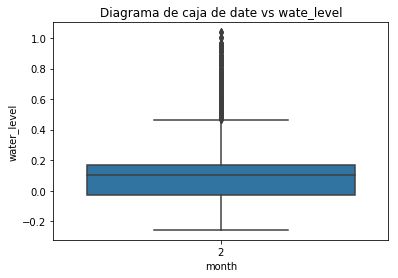

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Diagrama de caja de date vs wate_level")
ax = sns.boxplot(x="month", y="water_level", data=df)
plt.show()

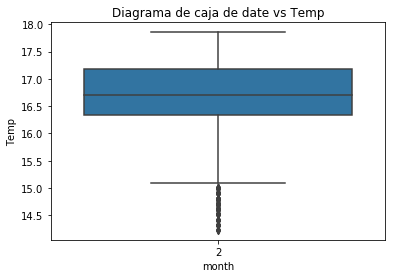

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Diagrama de caja de date vs Temp")
ax = sns.boxplot(x="month", y="Temp", data=df)
plt.show()

In [9]:
df2 = pd.concat([df['water_level'], df1['salinity']], axis=1)
df2.head()

,water_level,salinity
3,0.032,39.8482
4,0.032,40.0203
5,0.032,40.2595
6,0.032,40.2458
7,0.032,40.4226


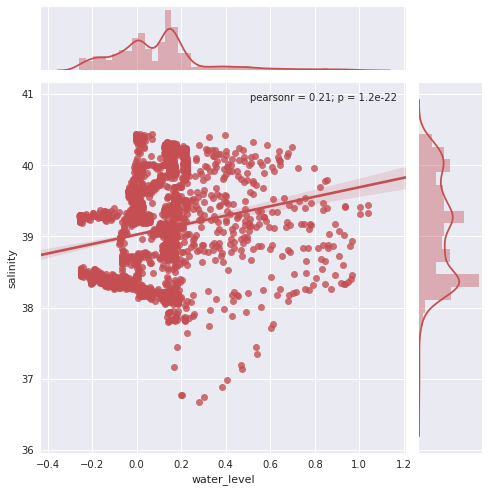

In [10]:
#Diagrama de Pearson de water_level vs salinity
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("water_level", "salinity", data=df2, kind="reg", color="r", size=7)
plt.show(g)


In [11]:
df3 = pd.concat([df['water_level'], df1['temp']], axis=1)
df3.head()

,water_level,temp
3,0.032,17.23
4,0.032,17.17
5,0.032,17.14
6,0.032,17.11
7,0.032,17.10


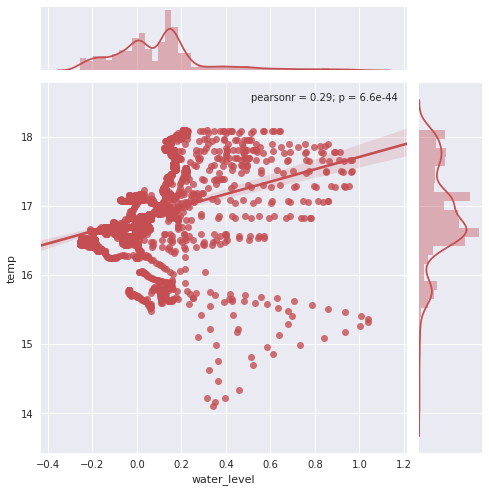

In [12]:
#Diagrama de pearson de water_level vs temp
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("water_level", "temp", data=df3, kind="reg", color="r", size=7)
plt.show(g)


In [13]:
df4 = pd.concat([df1['salinity'], df['Temp']], axis=1)
df4.head()

,salinity,Temp
3,39.8482,16.903
4,40.0203,16.903
5,40.2595,16.903
6,40.2458,16.903
7,40.4226,16.903


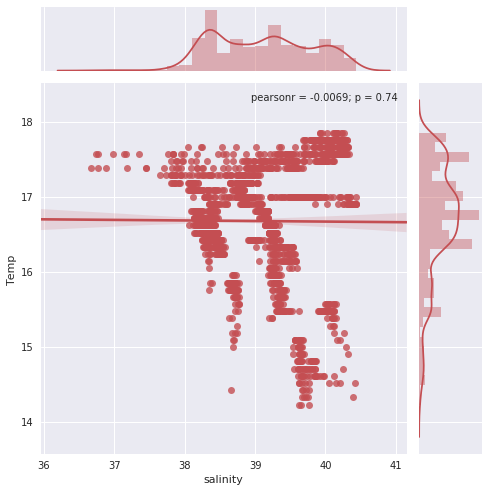

In [14]:
#Diagrama de pearson de salinity vs Temp
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("salinity","Temp",  data=df4, kind="reg", color="r", size=7)
plt.show(g)

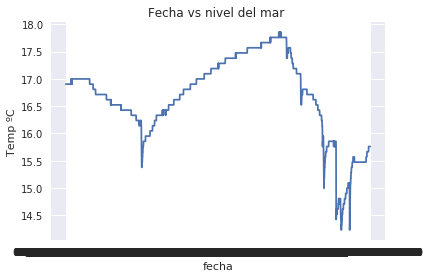

In [15]:
plt.plot_date(x=df.Date, y=df.Temp, fmt="b-")
plt.title("Fecha vs nivel del mar ")
plt.ylabel("Temp ºC")
plt.xlabel("fecha")
plt.grid(True)
plt.show()

In [ ]:
df = df4[['water_level','Temp']]
plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("")
plt.ylabel("water_level/(%) salinity")
plt.grid(True)
plt.show()

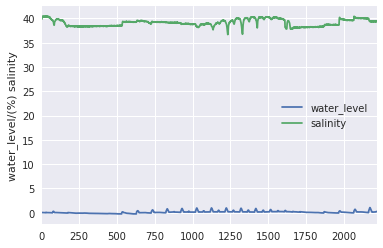

In [16]:
df2 = df2[['water_level','salinity']]
plt.figure(); df2.plot(); plt.legend(loc='best')
plt.title("")
plt.ylabel("water_level/(%) salinity")
plt.grid(True)
plt.show()